![zad1.png](images/note3/zad1.png)

In [1]:
# Zadanie w pdfie (images/note3/solutions)

![zad2.png](images/note3/zad2.png)


Part (a): MLE for Lognormal Distribution
----------------------------------------
True parameters: x0 = 2.0, sigma = 0.5
MLE estimates:   x0 = 2.0194, sigma = 0.4894

Part (b): Linear Regression - MLE vs Least Squares
------------------------------------------------
True parameters: a = 2.0, b = 1.0
Least Squares:   a = 2.0069, b = 0.9136
MLE estimates:   a = 2.0069, b = 0.9136


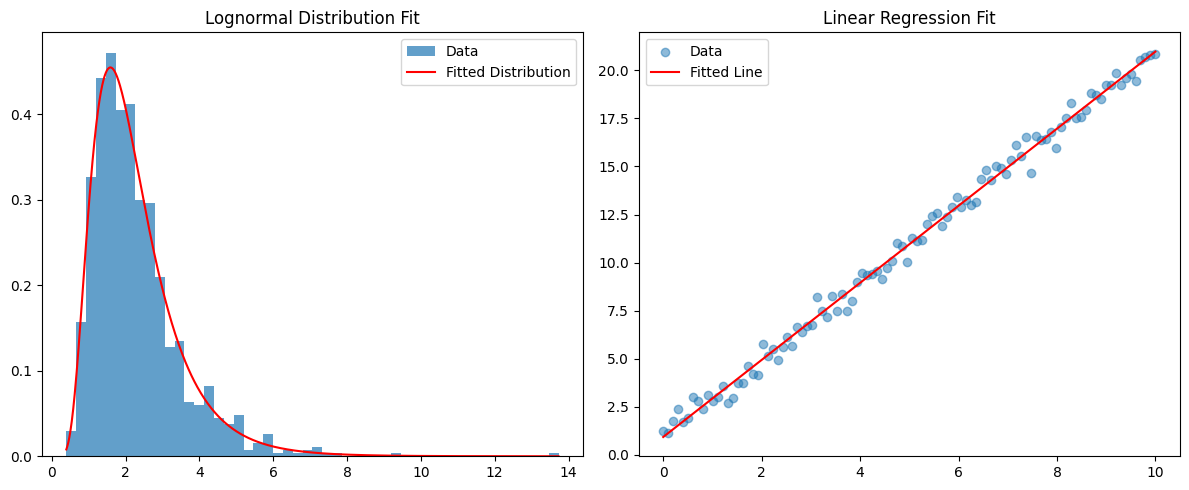

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def log_likelihood_lognormal(params, data):
    x0, sigma = params
    n = len(data)

#     funkcja wiarygodności dla n niezależnych obserwacji to iloczyn gęstości:
#     L = ∏ᵢ PLN(xᵢ)
#     logarytm funkcji wiarygodności (zamieniamy iloczyn na sumę):
#     ln(L) = ∑ᵢ ln(PLN(xᵢ))
#     podstawiamy wzór na PLN(x):
#     ln(L) = ∑ᵢ [ln(1/(xᵢ√(2πσ²))) - ln²(xᵢ/x₀)/(2σ²)]
#     przekształcamy i mamy wzór
    ll = -n * np.log(sigma) - n/2 * np.log(2*np.pi) - np.sum(np.log(data)) - \
         np.sum((np.log(data/x0)**2)/(2*sigma**2))

    # wracamy wartość ujemną, ponieważ chcemy minimalizować
    return -ll

def part_a_lognormal_mle():
    print("\nPart (a): MLE for Lognormal Distribution")
    print("----------------------------------------")

    # sztuczne dane z rozkładu lognormalnego
    true_x0 = 2.0
    true_sigma = 0.5
    n_samples = 1000
    np.random.seed(42)
    data = np.random.lognormal(mean=np.log(true_x0), sigma=true_sigma, size=n_samples)

    # szukamy estymatory MLE
    initial_guess = [1.0, 1.0]  # początkowe wartości [x0, sigma]
    result = optimize.minimize(log_likelihood_lognormal, initial_guess,
                             args=(data,), method='Nelder-Mead')

    x0_mle, sigma_mle = result.x

    print(f"True parameters: x0 = {true_x0}, sigma = {true_sigma}")
    print(f"MLE estimates:   x0 = {x0_mle:.4f}, sigma = {sigma_mle:.4f}")

    return data, x0_mle, sigma_mle

def part_b_linear_regression():
    print("\nPart (b): Linear Regression - MLE vs Least Squares")
    print("------------------------------------------------")

    # sztuczne dane
    np.random.seed(42)
    n_samples = 100
    true_a = 2.0
    true_b = 1.0
    sigma = 0.5

    # tworzymy dane z szumem gaussowskim
    x = np.linspace(0, 10, n_samples)
    epsilon = np.random.normal(0, sigma, n_samples)
    y = true_a * x + true_b + epsilon

    # szukamy rozwiązania metodą najmniejszych kwadratów
    X = np.vstack([x, np.ones(len(x))]).T
    a_ls, b_ls = np.linalg.lstsq(X, y, rcond=None)[0]

    # szukanie metodą MLE (która jest równoważna metodzie najmniejszych kwadratów dla szumu gaussowskiego)

    def neg_log_likelihood(params, x, y):
        a, b, sigma = params
        y_pred = a * x + b
        return n_samples/2 * np.log(2*np.pi*sigma**2) + \
               np.sum((y - y_pred)**2)/(2*sigma**2)

    result = optimize.minimize(neg_log_likelihood, [1.0, 1.0, 1.0],
                             args=(x, y), method='Nelder-Mead')
    a_mle, b_mle, sigma_mle = result.x

    print(f"True parameters: a = {true_a}, b = {true_b}")
    print(f"Least Squares:   a = {a_ls:.4f}, b = {b_ls:.4f}")
    print(f"MLE estimates:   a = {a_mle:.4f}, b = {b_mle:.4f}")

    return x, y, a_ls, b_ls, a_mle, b_mle

def plot_results(data, x0_mle, sigma_mle, x, y, a_ls, b_ls):
    plt.figure(figsize=(12, 5))

    # rozkład lognormalny
    plt.subplot(121)
    plt.hist(data, bins=50, density=True, alpha=0.7, label='Data')
    x_plot = np.linspace(min(data), max(data), 1000)
    y_plot = 1/(x_plot*np.sqrt(2*np.pi*sigma_mle**2)) * \
             np.exp(-(np.log(x_plot/x0_mle)**2)/(2*sigma_mle**2))
    plt.plot(x_plot, y_plot, 'r-', label='Fitted Distribution')
    plt.title('Lognormal Distribution Fit')
    plt.legend()

    # regresja liniowa
    plt.subplot(122)
    plt.scatter(x, y, alpha=0.5, label='Data')
    plt.plot(x, a_ls*x + b_ls, 'r-', label='Fitted Line')
    plt.title('Linear Regression Fit')
    plt.legend()

    plt.tight_layout()
    plt.show()

# pkt a
data, x0_mle, sigma_mle = part_a_lognormal_mle()

# pkt b
x, y, a_ls, b_ls, a_mle, b_mle = part_b_linear_regression()

plot_results(data, x0_mle, sigma_mle, x, y, a_ls, b_ls)

![zad3.png](images/note3/zad3.png)

In [3]:
import numpy as np
from scipy import stats

def read_data(filename):
    with open(filename, 'r') as f:
        # wczytujemy sobie dane jako tablicę liczb zmiennoprzecinkowych
        return np.array([float(line.strip()) for line in f])

def corrected_ks_statistic(u, N):
    # stosujemy korekty dla statystyki testowej KS zgodnie z podanym wzorem:
    # u -> u + ( 1 / (6 * sqrt(N))) + ((u-1) / (4*N)) gdzie:
    # - u: statystyka testowa KS
    # - N: liczba próbek
    return u + 1/(6*np.sqrt(N)) + (u-1)/(4*N)

# wczytujemy dane
data_a = read_data('data/dat2a.txt')
data_b = read_data('data/dat2b.txt')

# podpunkt a) sprawdzamy czy dane z dat2a.txt pochodzą z rozkładu normalnego N(5, 2)
ks_stat_a, _ = stats.kstest(data_a, 'norm', args=(5, 2))
N_a = len(data_a)
corrected_stat_a = corrected_ks_statistic(ks_stat_a, N_a)
p_value_a = stats.kstwobign.sf(corrected_stat_a * np.sqrt(N_a))

# podpunkt b) sprawdzamy czy dane z dat2b.txt pochodzą z rozkładu normalnego N(5, 2)
ks_stat_b, _ = stats.kstest(data_b, 'norm', args=(5, 2))
N_b = len(data_b)
corrected_stat_b = corrected_ks_statistic(ks_stat_b, N_b)
p_value_b = stats.kstwobign.sf(corrected_stat_b * np.sqrt(N_b))


# podkpunkt c) sprawdzamy czy dane z dat2a.txt i dat2b.txt pochodzą z tego samego rozkładu
ks_stat_ab, _ = stats.ks_2samp(data_a, data_b)
N_ab = min(len(data_a), len(data_b))
corrected_stat_ab = corrected_ks_statistic(ks_stat_ab, N_ab)
p_value_ab = stats.kstwobign.sf(corrected_stat_ab * np.sqrt(N_ab/2))


# poziom istotności 5%
alpha = 0.05

print("\nKolmogorov-Smirnov test results (α = 0.05):")

print("\na) Testing if dat2a.txt come from N(5,2):")
print(f"D_N = {ks_stat_a:.6f}")
print(f"Corrected D_N = {corrected_stat_a:.6f}")
print(f"p-value = {p_value_a:.6f}")
print(f"Conclusion: {'no' if p_value_a < alpha else 'probably yes'}")

print("\nb) Testing if dat2b.txt come from N(5,2):")
print(f"D_N = {ks_stat_b:.6f}")
print(f"Corrected D_N = {corrected_stat_b:.6f}")
print(f"p-value = {p_value_b:.6f}")
print(f"Conclusion: {'no' if p_value_b < alpha else 'probably yes'}")

print("\nc) Testing if dat2a.txt and dat2b.txt come from the same distribution:")
print(f"D_N = {ks_stat_ab:.6f}")
print(f"Corrected D_N = {corrected_stat_ab:.6f}")
print(f"p-value = {p_value_ab:.6f}")
print(f"Conclusion: {'no' if p_value_ab < alpha else 'probably yes'}")
# probably yes oznacza, że nie ma wystarczających dowodów,
# aby odrzucić hipotezę zerową (dla a i b hipoteza zerowa to hipoteza, że dane
# pochodzą z rozkładu N(5,2), a dla c hipoteza to, że dane pochodzą z tego samego
# rozkładu)
# no oznacza, że mamy wystarczające dowody, aby odrzucić hipotezę zerową
# jeśli p-value < 0.05 to odrzucamy hipoteze
# jeśli p-value ≥ 0.05 to nie odrzucamy hipotezy


Kolmogorov-Smirnov test results (α = 0.05):

a) Testing if dat2a.txt come from N(5,2):
D_N = 0.029311
Corrected D_N = 0.039883
p-value = 0.908036
Conclusion: probably yes

b) Testing if dat2b.txt come from N(5,2):
D_N = 0.105858
Corrected D_N = 0.116525
p-value = 0.008755
Conclusion: no

c) Testing if dat2a.txt and dat2b.txt come from the same distribution:
D_N = 0.115000
Corrected D_N = 0.125679
p-value = 0.084927
Conclusion: probably yes
